In [1]:
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from timeit import default_timer as timer
import cv2
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
def test_set(test_dir):
    test_ds = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        image_size=(224, 224),
        batch_size=32,
        label_mode='binary',
        shuffle=False
    )

    return test_ds

def evaluate_model(model, test_ds, feed_type):
    # Evaluate the model on the test dataset
    test_loss, test_accuracy = model.evaluate(test_ds)
    print(f'Test Loss: {test_loss}')
    print(f'Test Accuracy: {test_accuracy}')

    # Generate predictions
    y_true = np.concatenate([y for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    y_pred = (y_pred > 0.5).astype(int)  # For binary classification

    # Compute evaluation metrics
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=["Adulterated", "Pure"]))

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Display the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Adulterated', 'Pure'], yticklabels=['Adulterated', 'Pure'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix ({feed_type})')
    plt.show()

In [4]:
# Testing Dataset Directory

# Rice Bran
# test_dir_rb = test_set('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Testing/Set 3')
test_dir_rb = test_set('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Rice Bran\\Testing\\Set 1')
#test_dir = '/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Testing/Set 2'
#test_dir_rb = test_set('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Rice Bran/Testing/Set 4')

# Soybean Meal
# test_dir_sbm = test_set('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Testing/Set 2')
test_dir_sbm = test_set('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Soybean Meal\\Testing\\Set 1')
#test_dir_sbm = test_set('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Soybean Meal/Testing/Set 3')

# Corn
# test_dir_corn = test_set('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Testing/Set 2')
test_dir_corn = test_set('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Dataset Images\\Corn\\Testing\\Set 1')
#test_dir_corn = test_set('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Dataset/Corn/Testing/Set 1')

Found 600 files belonging to 2 classes.
Found 600 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


In [5]:
# Load Saved Models

# Rice Bran
# loaded_model_rb = load_model('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Saved Models/Rice Bran/set3_rb_resnet_9.h5')
resnet_rb_model_1 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Rice Bran\\set3_rb_resnet_1.h5')
resnet_rb_model_2 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Rice Bran\\set3_rb_resnet_2.h5')
resnet_rb_model_3 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Rice Bran\\set3_rb_resnet_3.h5')
resnet_rb_model_4 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Rice Bran\\set3_rb_resnet_4.h5')

vggnet_rb_model_1 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Rice Bran\\set3_rb_vggnet_1.h5')
vggnet_rb_model_2 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Rice Bran\\set3_rb_vggnet_2.h5')
vggnet_rb_model_3 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Rice Bran\\set3_rb_vggnet_3.h5')
vggnet_rb_model_4 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Rice Bran\\set3_rb_vggnet_4.h5')

# Soybean Meal
# loaded_model_rb = load_model('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Saved Models/Rice Bran/set3_rb_resnet_9.h5')
resnet_sbm_model_1 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Soybean Meal\\set2_sbm_resnet_1.h5')
resnet_sbm_model_2 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Soybean Meal\\set2_sbm_resnet_2.h5')
resnet_sbm_model_3 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Soybean Meal\\set2_sbm_resnet_3.h5')
resnet_sbm_model_4 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Soybean Meal\\set2_sbm_resnet_4.h5')

vggnet_sbm_model_1 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Soybean Meal\\set2_sbm_vggnet_1.h5')
vggnet_sbm_model_2 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Soybean Meal\\set2_sbm_vggnet_2.h5')
vggnet_sbm_model_3 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Soybean Meal\\set2_sbm_vggnet_3.h5')
vggnet_sbm_model_4 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Soybean Meal\\set2_sbm_vggnet_4.h5')

# Corn
# loaded_model_rb = load_model('/mnt/c/Users/Room201B/Documents/Salem - Thesis/Saved Models/Rice Bran/set3_rb_resnet_9.h5')
resnet_corn_model_1 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Corn\\set2_corn_resnet_1.h5')
resnet_corn_model_2 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Corn\\set2_corn_resnet_2.h5')
resnet_corn_model_3 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Corn\\set2_corn_resnet_3.h5')
resnet_corn_model_4 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Corn\\set2_corn_resnet_4.h5')

vggnet_corn_model_1 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Corn\\set2_corn_vggnet_1.h5')
vggnet_corn_model_2 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Corn\\set2_corn_vggnet_2.h5')
vggnet_corn_model_3 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Corn\\set2_corn_vggnet_3.h5')
vggnet_corn_model_4 = load_model('C:\\Users\\hp\\Documents\\VSU Files\\Fourth Year\\Thesis\\Program\\Saved Models\\Corn\\set2_corn_vggnet_4.h5')

#### Model 1

RICE BRAN (ResNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 0.1054
Test Loss: 0.10681325197219849
Test Accuracy: 1.0
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      1.00      1.00       300
        Pure       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


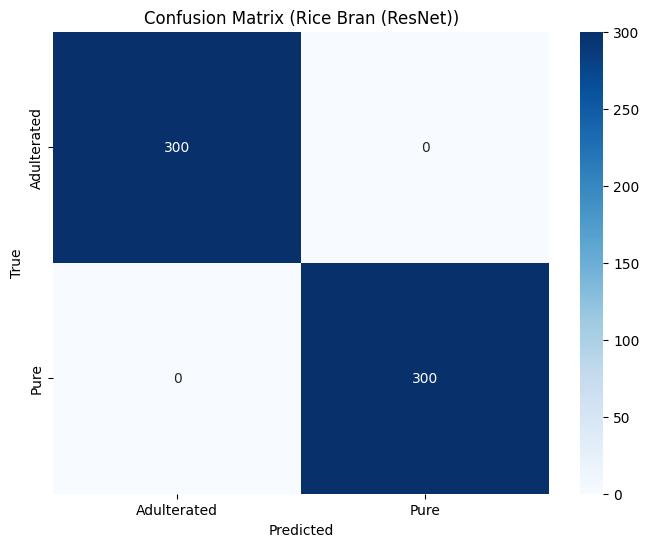

RICE BRAN (VGGNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9955 - loss: 0.1215
Test Loss: 0.11878657341003418
Test Accuracy: 0.9933333396911621
19/19 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       0.99      1.00      0.99       300
        Pure       1.00      0.99      0.99       300

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600

Precision: 1.0
Recall: 0.9866666666666667
F1 Score: 0.9932885906040269


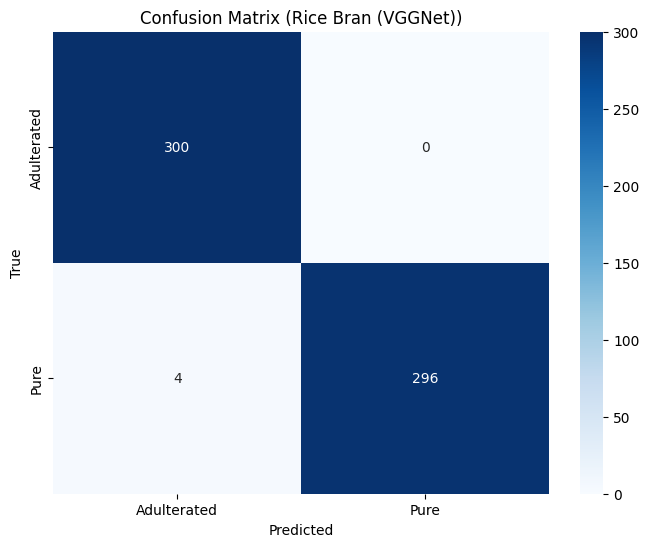

SOYBEAN MEAL (ResNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9819 - loss: 0.1610
Test Loss: 0.13838225603103638
Test Accuracy: 0.9900000095367432
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      0.98      0.99       300
        Pure       0.98      1.00      0.99       300

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600

Precision: 0.9803921568627451
Recall: 1.0
F1 Score: 0.9900990099009901


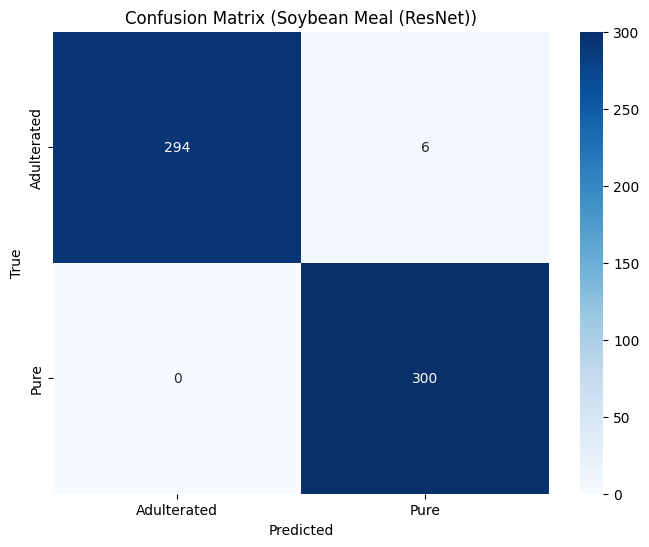

SOYBEAN MEAL (VGGNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.8642 - loss: 0.3303
Test Loss: 0.2556188106536865
Test Accuracy: 0.9100000262260437
19/19 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       0.94      0.88      0.91       300
        Pure       0.88      0.94      0.91       300

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600

Precision: 0.884375
Recall: 0.9433333333333334
F1 Score: 0.9129032258064517


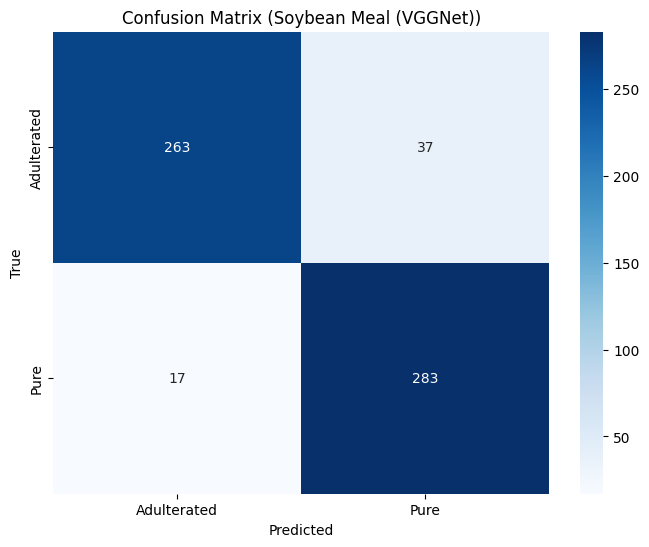

GROUND CORN (ResNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 1.0000 - loss: 0.1266
Test Loss: 0.12441255897283554
Test Accuracy: 1.0
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      1.00      1.00       300
        Pure       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


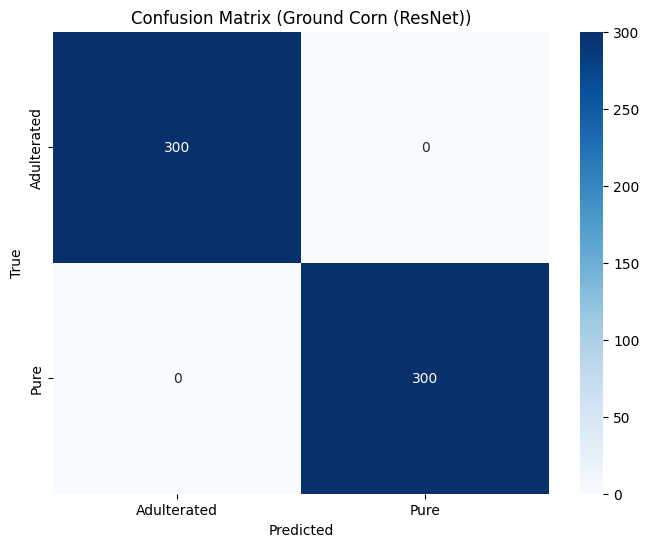

GROUND CORN (VGGNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9992 - loss: 0.1030
Test Loss: 0.09541879594326019
Test Accuracy: 0.9983333349227905
19/19 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      1.00      1.00       300
        Pure       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Precision: 1.0
Recall: 0.9966666666666667
F1 Score: 0.998330550918197


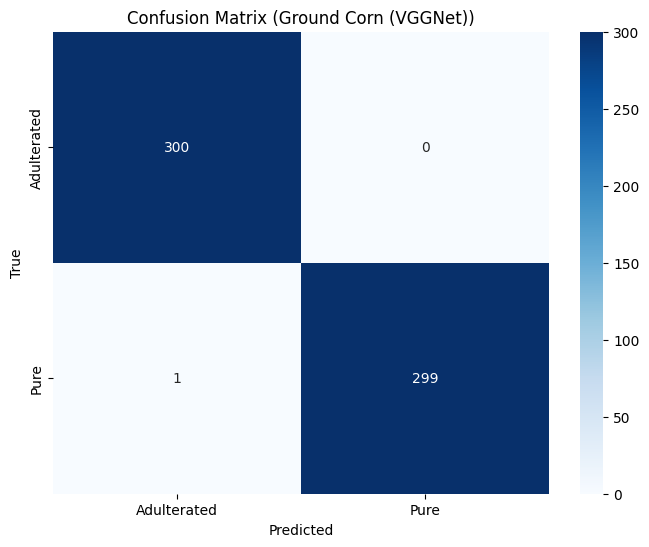

In [6]:
print('RICE BRAN (ResNet)')
evaluate_model(resnet_rb_model_1, test_dir_rb, 'Rice Bran (ResNet)')

print('RICE BRAN (VGGNet)')
evaluate_model(vggnet_rb_model_1, test_dir_rb, 'Rice Bran (VGGNet)')

print('SOYBEAN MEAL (ResNet)')
evaluate_model(resnet_sbm_model_1, test_dir_sbm, 'Soybean Meal (ResNet)')

print('SOYBEAN MEAL (VGGNet)')
evaluate_model(vggnet_sbm_model_1, test_dir_sbm, 'Soybean Meal (VGGNet)')

print('GROUND CORN (ResNet)')
evaluate_model(resnet_corn_model_1, test_dir_corn, 'Ground Corn (ResNet)')

print('GROUND CORN (VGGNet)')
evaluate_model(vggnet_corn_model_1, test_dir_corn, 'Ground Corn (VGGNet)')

#### Model 2

RICE BRAN (ResNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9989 - loss: 0.2982
Test Loss: 0.30030807852745056
Test Accuracy: 0.9983333349227905
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      1.00      1.00       300
        Pure       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Precision: 1.0
Recall: 0.9966666666666667
F1 Score: 0.998330550918197


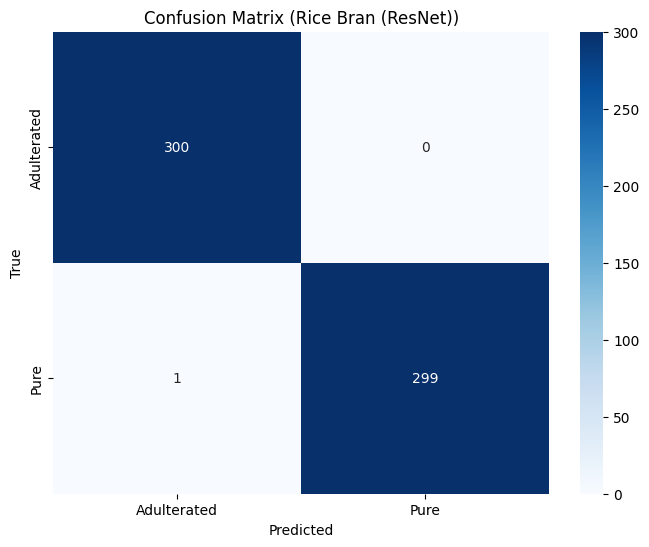

RICE BRAN (VGGNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.9140 - loss: 0.5749
Test Loss: 0.5771400332450867
Test Accuracy: 0.9350000023841858
19/19 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       0.92      0.96      0.94       300
        Pure       0.95      0.91      0.93       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.93       600
weighted avg       0.94      0.94      0.93       600

Precision: 0.9547038327526133
Recall: 0.9133333333333333
F1 Score: 0.9335604770017035


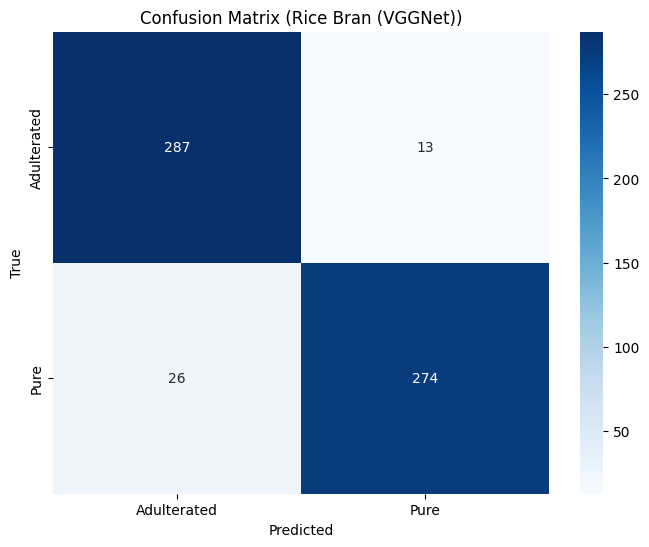

SOYBEAN MEAL (ResNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8532 - loss: 0.5321
Test Loss: 0.45396509766578674
Test Accuracy: 0.8899999856948853
19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       0.96      0.82      0.88       300
        Pure       0.84      0.96      0.90       300

    accuracy                           0.89       600
   macro avg       0.90      0.89      0.89       600
weighted avg       0.90      0.89      0.89       600

Precision: 0.8401162790697675
Recall: 0.9633333333333334
F1 Score: 0.8975155279503105


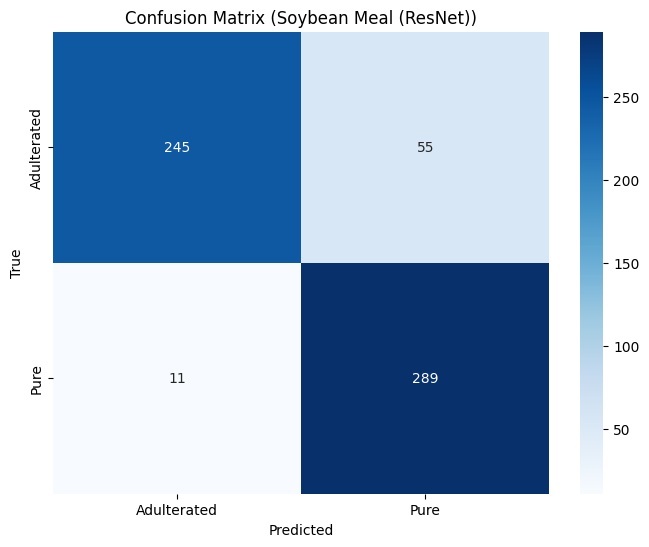

SOYBEAN MEAL (VGGNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.6437 - loss: 0.8508
Test Loss: 0.7492163181304932
Test Accuracy: 0.7816666960716248
19/19 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       0.91      0.63      0.74       300
        Pure       0.72      0.94      0.81       300

    accuracy                           0.78       600
   macro avg       0.81      0.78      0.78       600
weighted avg       0.81      0.78      0.78       600

Precision: 0.7150127226463104
Recall: 0.9366666666666666
F1 Score: 0.810966810966811


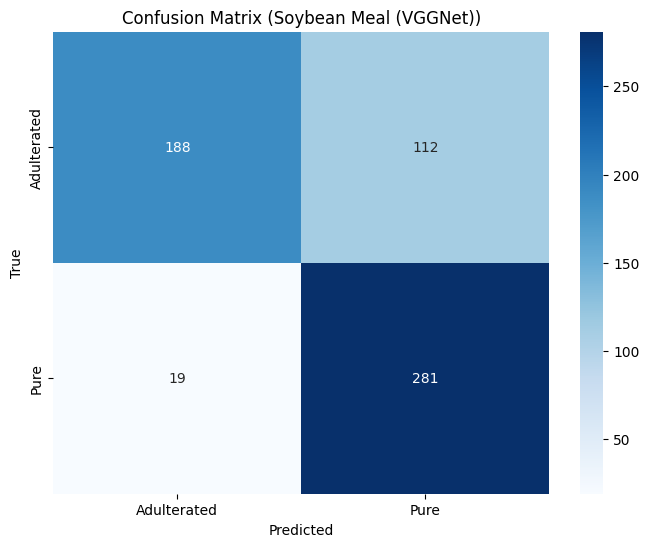

GROUND CORN (ResNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9623 - loss: 0.4170
Test Loss: 0.4271629750728607
Test Accuracy: 0.9800000190734863
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      0.96      0.98       300
        Pure       0.96      1.00      0.98       300

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

Precision: 0.9615384615384616
Recall: 1.0
F1 Score: 0.9803921568627451


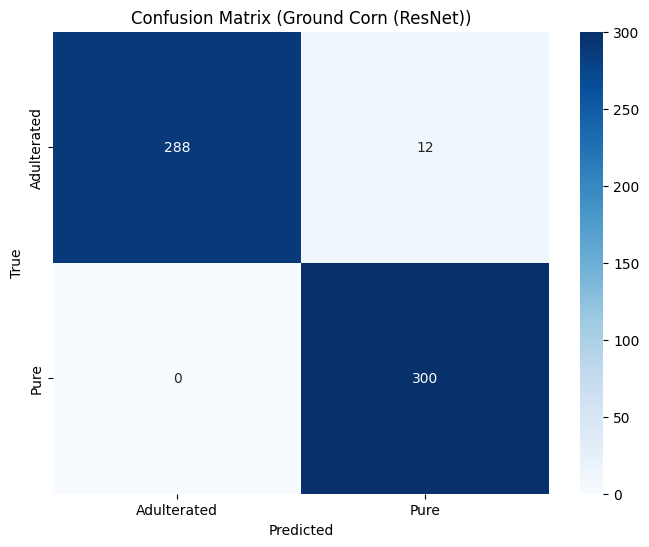

GROUND CORN (VGGNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.9094 - loss: 0.6285
Test Loss: 0.6617438197135925
Test Accuracy: 0.92166668176651
19/19 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       0.93      0.92      0.92       300
        Pure       0.92      0.93      0.92       300

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

Precision: 0.9174917491749175
Recall: 0.9266666666666666
F1 Score: 0.9220563847429519


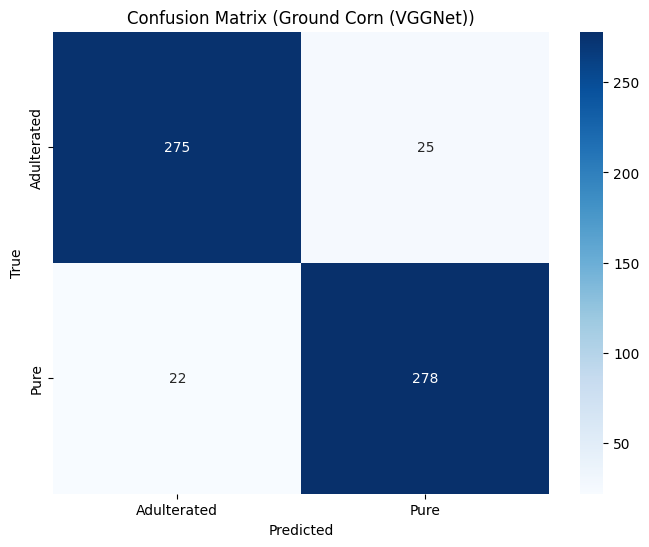

In [7]:
print('RICE BRAN (ResNet)')
evaluate_model(resnet_rb_model_2, test_dir_rb, 'Rice Bran (ResNet)')

print('RICE BRAN (VGGNet)')
evaluate_model(vggnet_rb_model_2, test_dir_rb, 'Rice Bran (VGGNet)')

print('SOYBEAN MEAL (ResNet)')
evaluate_model(resnet_sbm_model_2, test_dir_sbm, 'Soybean Meal (ResNet)')

print('SOYBEAN MEAL (VGGNet)')
evaluate_model(vggnet_sbm_model_2, test_dir_sbm, 'Soybean Meal (VGGNet)')

print('GROUND CORN (ResNet)')
evaluate_model(resnet_corn_model_2, test_dir_corn, 'Ground Corn (ResNet)')

print('GROUND CORN (VGGNet)')
evaluate_model(vggnet_corn_model_2, test_dir_corn, 'Ground Corn (VGGNet)')

#### Model 3

RICE BRAN (ResNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 1.0000 - loss: 0.1558
Test Loss: 0.15648970007896423
Test Accuracy: 1.0
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      1.00      1.00       300
        Pure       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


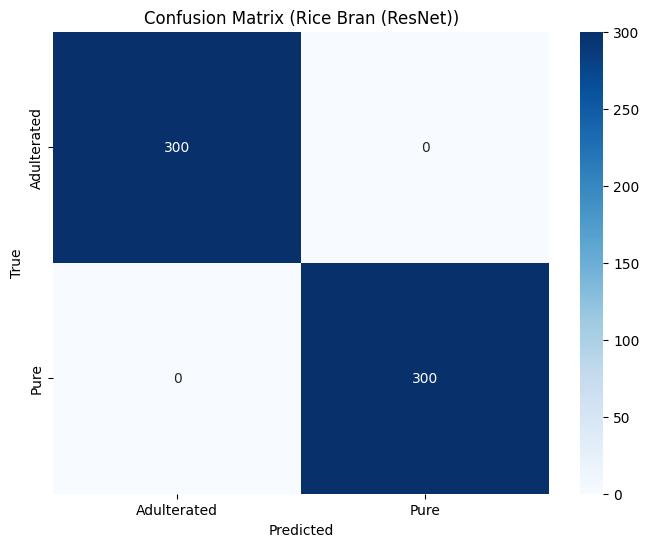

RICE BRAN (VGGNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 1.0000 - loss: 0.1793
Test Loss: 0.17731285095214844
Test Accuracy: 1.0
19/19 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      1.00      1.00       300
        Pure       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


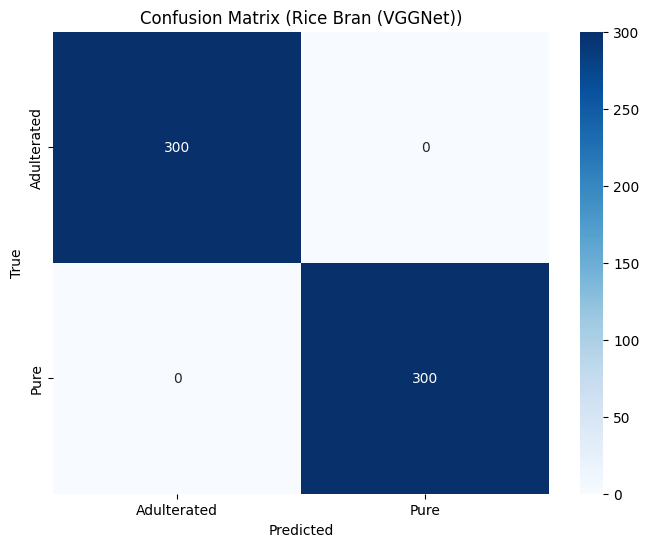

SOYBEAN MEAL (ResNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 1.0000 - loss: 0.1891
Test Loss: 0.18768924474716187
Test Accuracy: 1.0
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      1.00      1.00       300
        Pure       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


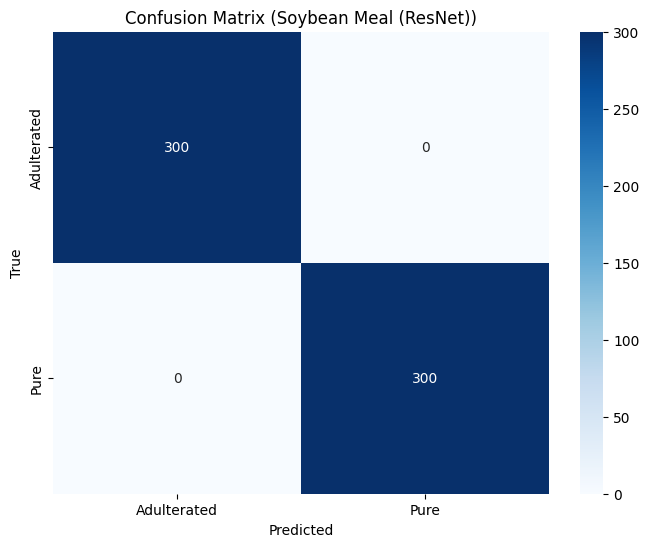

SOYBEAN MEAL (VGGNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.9500 - loss: 0.3041
Test Loss: 0.262105792760849
Test Accuracy: 0.9616666436195374
19/19 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       0.97      0.95      0.96       300
        Pure       0.95      0.97      0.96       300

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

Precision: 0.9540983606557377
Recall: 0.97
F1 Score: 0.9619834710743802


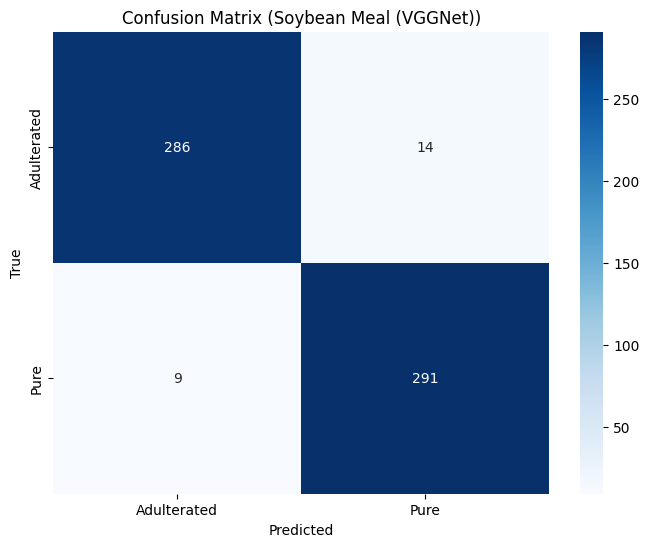

GROUND CORN (ResNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 0.1808
Test Loss: 0.175527423620224
Test Accuracy: 1.0
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      1.00      1.00       300
        Pure       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


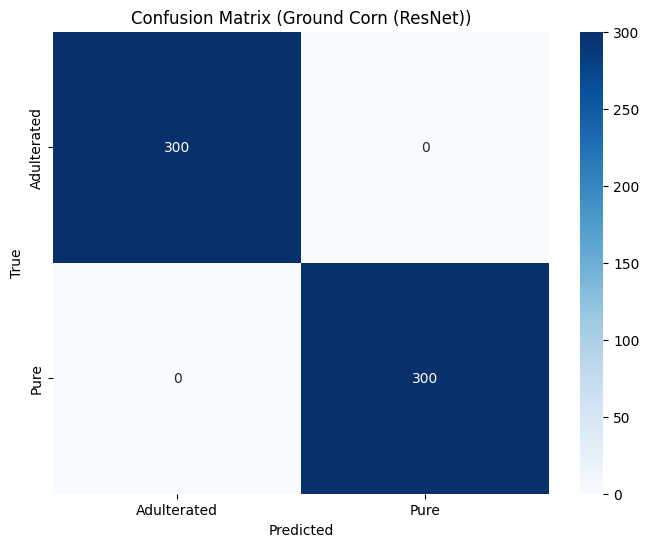

GROUND CORN (VGGNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 1.0000 - loss: 0.1907
Test Loss: 0.18292756378650665
Test Accuracy: 1.0
19/19 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      1.00      1.00       300
        Pure       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


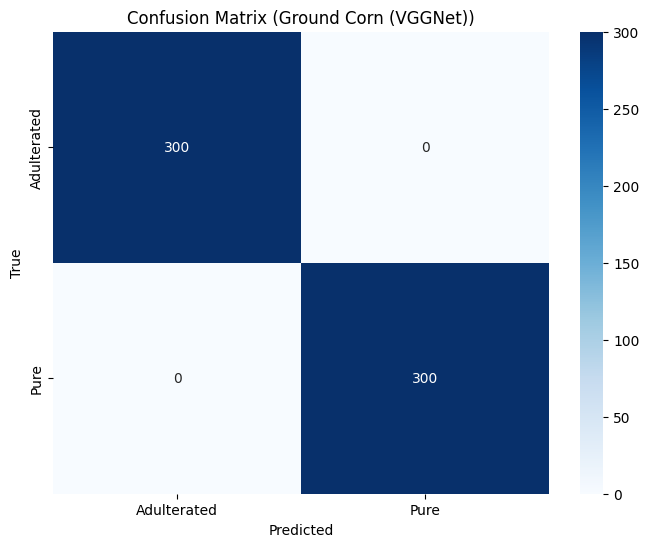

In [8]:
print('RICE BRAN (ResNet)')
evaluate_model(resnet_rb_model_3, test_dir_rb, 'Rice Bran (ResNet)')

print('RICE BRAN (VGGNet)')
evaluate_model(vggnet_rb_model_3, test_dir_rb, 'Rice Bran (VGGNet)')

print('SOYBEAN MEAL (ResNet)')
evaluate_model(resnet_sbm_model_3, test_dir_sbm, 'Soybean Meal (ResNet)')

print('SOYBEAN MEAL (VGGNet)')
evaluate_model(vggnet_sbm_model_3, test_dir_sbm, 'Soybean Meal (VGGNet)')

print('GROUND CORN (ResNet)')
evaluate_model(resnet_corn_model_3, test_dir_corn, 'Ground Corn (ResNet)')

print('GROUND CORN (VGGNet)')
evaluate_model(vggnet_corn_model_3, test_dir_corn, 'Ground Corn (VGGNet)')

#### Model 4

RICE BRAN (ResNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9917 - loss: 0.4423
Test Loss: 0.452332466840744
Test Accuracy: 0.9900000095367432
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      0.98      0.99       300
        Pure       0.98      1.00      0.99       300

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600

Precision: 0.9803921568627451
Recall: 1.0
F1 Score: 0.9900990099009901


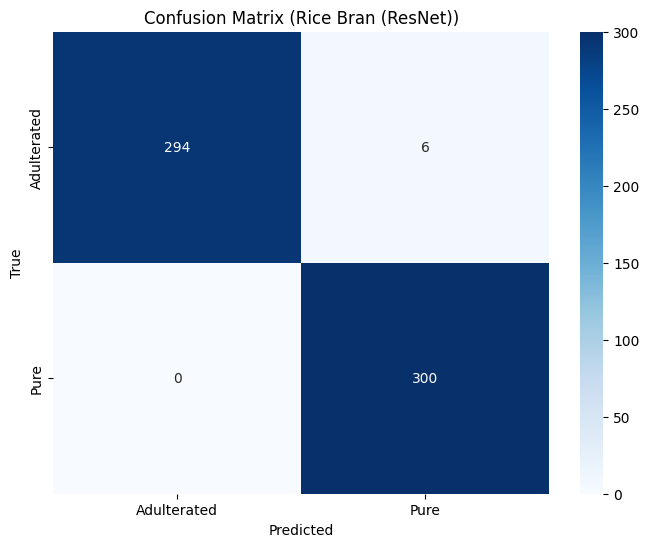

RICE BRAN (VGGNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9581 - loss: 0.5731
Test Loss: 0.5729947090148926
Test Accuracy: 0.9599999785423279
19/19 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       0.94      0.98      0.96       300
        Pure       0.98      0.94      0.96       300

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

Precision: 0.9825174825174825
Recall: 0.9366666666666666
F1 Score: 0.9590443686006825


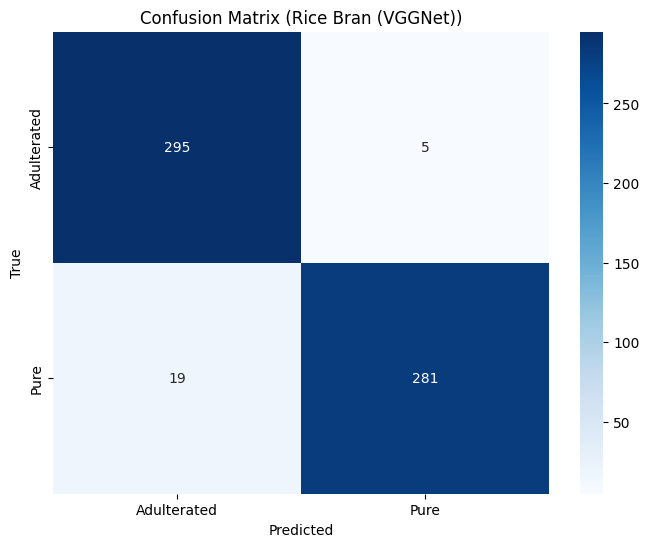

SOYBEAN MEAL (ResNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7997 - loss: 0.8044
Test Loss: 0.6661718487739563
Test Accuracy: 0.8849999904632568
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      0.77      0.87       300
        Pure       0.81      1.00      0.90       300

    accuracy                           0.89       600
   macro avg       0.91      0.89      0.88       600
weighted avg       0.91      0.89      0.88       600

Precision: 0.8130081300813008
Recall: 1.0
F1 Score: 0.8968609865470852


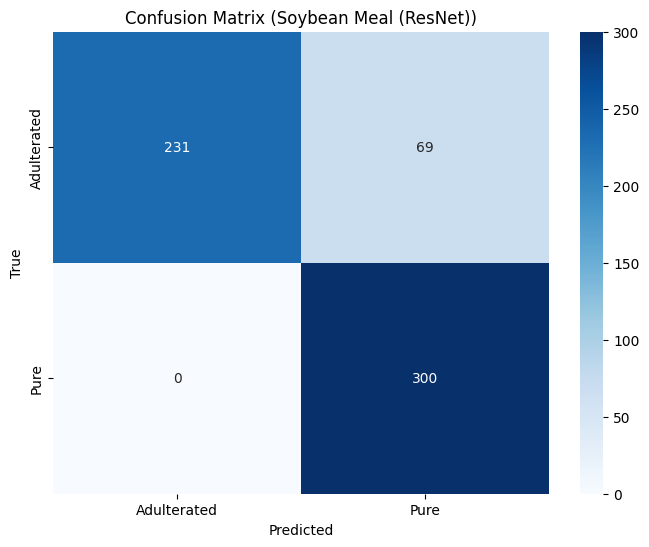

SOYBEAN MEAL (VGGNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.7148 - loss: 0.9578
Test Loss: 0.8231431245803833
Test Accuracy: 0.824999988079071
19/19 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       0.95      0.69      0.80       300
        Pure       0.76      0.96      0.85       300

    accuracy                           0.82       600
   macro avg       0.85      0.82      0.82       600
weighted avg       0.85      0.82      0.82       600

Precision: 0.7559055118110236
Recall: 0.96
F1 Score: 0.8458149779735683


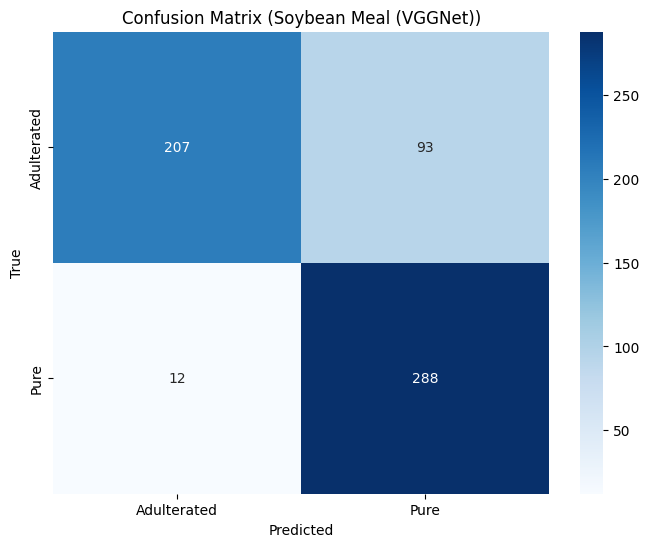

GROUND CORN (ResNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9709 - loss: 0.5150
Test Loss: 0.5047072768211365
Test Accuracy: 0.9833333492279053
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      0.97      0.98       300
        Pure       0.97      1.00      0.98       300

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

Precision: 0.967741935483871
Recall: 1.0
F1 Score: 0.9836065573770492


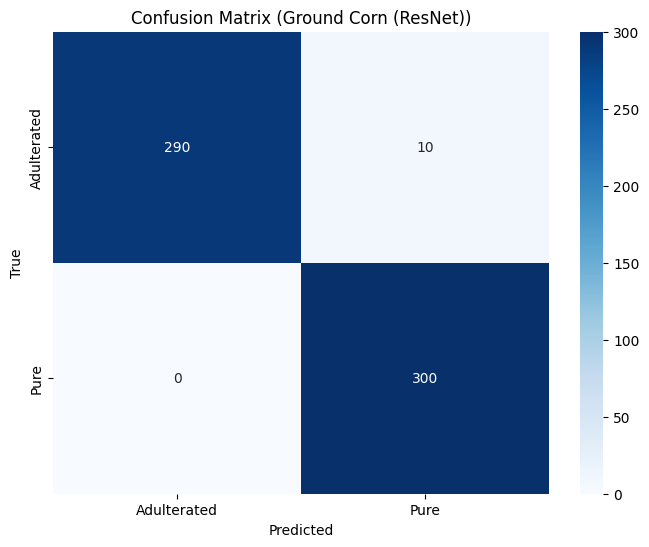

GROUND CORN (VGGNet)
19/19 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9986 - loss: 0.6049
Test Loss: 0.5910032391548157
Test Accuracy: 0.9983333349227905
19/19 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step
Classification Report:
              precision    recall  f1-score   support

 Adulterated       1.00      1.00      1.00       300
        Pure       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Precision: 0.9966777408637874
Recall: 1.0
F1 Score: 0.9983361064891847


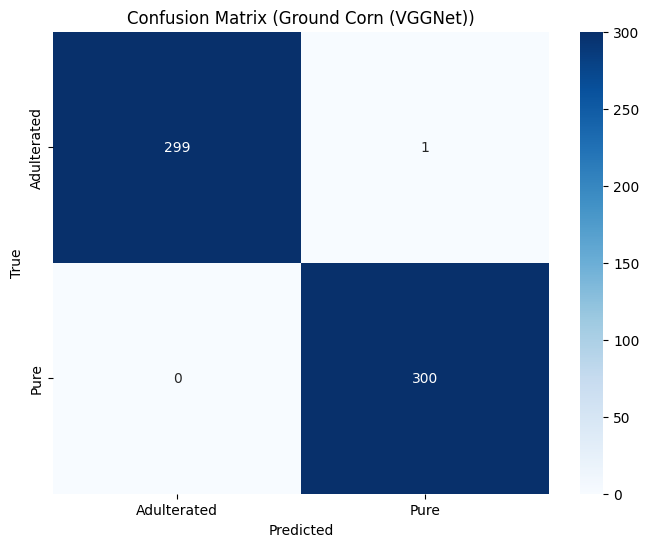

In [9]:
print('RICE BRAN (ResNet)')
evaluate_model(resnet_rb_model_4, test_dir_rb, 'Rice Bran (ResNet)')

print('RICE BRAN (VGGNet)')
evaluate_model(vggnet_rb_model_4, test_dir_rb, 'Rice Bran (VGGNet)')

print('SOYBEAN MEAL (ResNet)')
evaluate_model(resnet_sbm_model_4, test_dir_sbm, 'Soybean Meal (ResNet)')

print('SOYBEAN MEAL (VGGNet)')
evaluate_model(vggnet_sbm_model_4, test_dir_sbm, 'Soybean Meal (VGGNet)')

print('GROUND CORN (ResNet)')
evaluate_model(resnet_corn_model_4, test_dir_corn, 'Ground Corn (ResNet)')

print('GROUND CORN (VGGNet)')
evaluate_model(vggnet_corn_model_4, test_dir_corn, 'Ground Corn (VGGNet)')